In [1]:
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

from parsing.habr import HabrParser

In [2]:
%%time
post = HabrPost(post_id=807711)
post.title

CPU times: user 238 ms, sys: 7.5 ms, total: 246 ms
Wall time: 540 ms


'Security Week 2416: уязвимость в серверных материнских платах Intel, Lenovo и Supermicro'

In [5]:
res = HabrParser.parse_posts(10000, n_threads=10)

  9%|▉         | 920/10000 [01:24<29:51,  5.07it/s]

Произошла ошибка для id = 806793 'NoneType' object has no attribute 'text'


 44%|████▍     | 4400/10000 [07:09<11:25,  8.17it/s]  

Произошла ошибка для id = 803313 'NoneType' object has no attribute 'text'


 54%|█████▍    | 5425/10000 [08:49<07:15, 10.51it/s]

Произошла ошибка для id = 802211 'NoneType' object has no attribute 'text'


 56%|█████▋    | 5647/10000 [09:14<33:45,  2.15it/s]

Произошла ошибка для id = 802017 'NoneType' object has no attribute 'text'


 80%|███████▉  | 7957/10000 [12:43<02:48, 12.09it/s]

451
Произошла ошибка для id = 799751 'HabrPost' object has no attribute 'soup'


 83%|████████▎ | 8271/10000 [13:11<02:41, 10.74it/s]

Произошла ошибка для id = 799441 'NoneType' object has no attribute 'text'


 84%|████████▍ | 8445/10000 [13:27<02:04, 12.48it/s]

Произошла ошибка для id = 799275 'NoneType' object has no attribute 'text'


100%|██████████| 10000/10000 [15:50<00:00, 10.52it/s]


In [6]:
df = pd.DataFrame(res)
df

,post_id,author,title,tags,text
0,807711,Kaspersky_Lab,Security Week 2416: уязвимость в серверных мат...,"[Блог компании «Лаборатория Касперского», Инфо...",На прошлой неделе исследователи компании Binar...
1,807709,markshevchenko,Вычислительные выражения: Подробнее про типы-о...,"[.NET, Функциональное программирование, F#]",В предыдущем посте мы познакомились с концепци...
2,807707,ru_vds,Угадай местоположение льдины с арктическим ЦОД...,"[Блог компании RUVDS.com, Хостинг, Системное а...","Как вы наверняка знаете, 12 апреля RUVDS успеш..."
3,807705,shaddyk,Запустили проект с НСИС по повышению качества ...,"[Блог компании HFLabs, Открытые данные, IT-ком...",НСИС — оператор единой автоматизированной инфо...
4,807703,VokaMut,Тестируем AI на создании прикладного приложения,"[Веб-разработка, Искусственный интеллект, Natu...","Всем привет, я Григорий Тумаков, CTO в Моризо ..."
...,...,...,...,...,...
4371,797723,Squirrelfm,Анатомия эффективного собеседования. Что делат...,"[Блог компании Raft, Управление персоналом, Ка...","Я провел много собеседований за свою карьеру, ..."
4372,797721,maybe_elf,None,"[Законодательство в IT, Искусственный интеллек...",В OpenAI рассказали о мотивах Илона Маска при ...
4373,797719,ar4w,SD-Access без DNAC и ISE,"[Информационная безопасность, IT-инфраструктур...",В 2019 мы закупили комплект оборудования и лиц...
4374,797715,maybe_elf,Meta* удалит все учётные записи Oculus в конце...,"[Управление сообществом, Разработка под AR и V...",Meta* в электронной рассылке сообщила пользова...


In [7]:
df.to_parquet(Path("../data/habr_posts_dataset.parquet"))

## Small EDA

In [2]:
df = pd.read_parquet(Path("../data/habr_posts_dataset.parquet"))

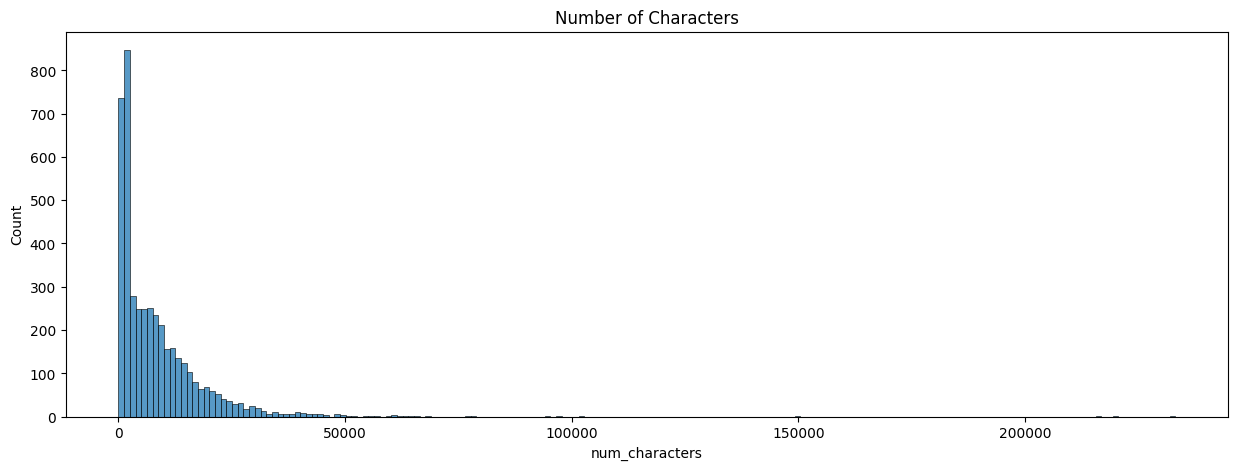

In [3]:
fig = plt.figure(figsize=(15, 5))
df["num_characters"] = df["text"].str.len()

sns.histplot(data=df, x="num_characters")
plt.title("Number of Characters")
plt.show()

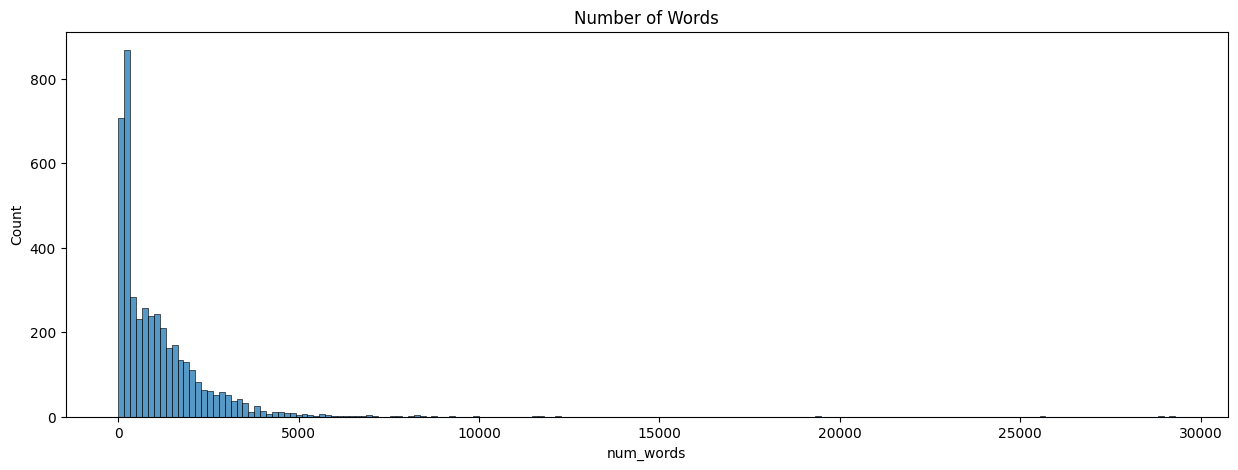

In [4]:
fig = plt.figure(figsize=(15, 5))
df["num_words"] = df["text"].apply(
    lambda x: len(str(x).split()))
sns.histplot(data=df, x="num_words")
plt.title("Number of Words")
plt.show()